In [ ]:
'''
Série histórica do levantamento de preços e de margens de comercialização de combustíveis
A seguir, estão disponibilizadas planilhas eletrônicas contemplando a série histórica do 
Levantamento de Preços e de Margens de Comercialização de Combustíveis, tanto semanal quanto mensal, 
segregada por abrangência geográfica e incluindo os seguintes combustíveis: gasolina comum, 
etanol hidratado, óleo diesel não aditivado, gás natural veicular (GNV) e gás liquefeito 
de petróleo (GLP – botijão de 13 quilos). O óleo diesel S-10 foi introduzido em consonância 
com as regras de comercialização dispostas na Resolução ANP nº 65/2011.

Fonte: http://www.anp.gov.br/precos-e-defesa-da-concorrencia/precos/levantamento-de-precos/serie-historica-do-levantamento-de-precos-e-de-margens-de-comercializacao-de-combustiveis

O que pode ser feito com isso?
Como diferentes regiões do Brasil viram seus preços de gás mudarem?
Dentro de uma região, quais estados aumentaram mais seus preços?
Quais estados são os mais baratos (ou mais caros) para diferentes tipos de combustíveis?

'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
data1 = '2004-2019.tsv'

In [26]:
df=pd.read_csv(data1, sep='\t',parse_dates=[1,2])

In [27]:
df.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,...,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,...,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,...,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,...,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,...,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,...,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [53]:
df.columns

Index(['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO', 'MÊS',
       'ANO'],
      dtype='object')

In [28]:
# Verificando o shape do dataframe
df.shape

(106823, 21)

In [54]:
df['PRODUTO'].value_counts()

GASOLINA COMUM      21194
ÓLEO DIESEL         21194
GLP                 21186
ETANOL HIDRATADO    21102
GNV                 13034
ÓLEO DIESEL S10      9113
Name: PRODUTO, dtype: int64

In [59]:
df[['ESTADO','PREÇO MÉDIO REVENDA','DATA FINAL']].max()

ESTADO                           TOCANTINS
PREÇO MÉDIO REVENDA                 99.357
DATA FINAL             2019-06-29 00:00:00
dtype: object

In [60]:
df[['ESTADO','PREÇO MÉDIO REVENDA','DATA FINAL']].min()

ESTADO                                ACRE
PREÇO MÉDIO REVENDA                  0.766
DATA FINAL             2004-05-15 00:00:00
dtype: object

In [69]:
df['PREÇO MÉDIO REVENDA'].min()

0.7659999999999999

In [70]:
df['PREÇO MÉDIO REVENDA'].max()

99.357

In [75]:
df['ESTADO']=='SAO PAULO'

AttributeError: 'str' object has no attribute 'value_counts'

In [29]:
# Removendo a coluna serial desnecessária "Unnamed: 0"
df = df.drop("Unnamed: 0", axis=1)

In [30]:
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [31]:
# Verificando valores faltantes
df.isnull().sum()

DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
MÊS                              0
ANO                              0
dtype: int64

In [32]:
# verificando os tipos
df.dtypes

DATA INICIAL                     datetime64[ns]
DATA FINAL                       datetime64[ns]
REGIÃO                                   object
ESTADO                                   object
PRODUTO                                  object
NÚMERO DE POSTOS PESQUISADOS              int64
UNIDADE DE MEDIDA                        object
PREÇO MÉDIO REVENDA                     float64
DESVIO PADRÃO REVENDA                   float64
PREÇO MÍNIMO REVENDA                    float64
PREÇO MÁXIMO REVENDA                    float64
MARGEM MÉDIA REVENDA                     object
COEF DE VARIAÇÃO REVENDA                float64
PREÇO MÉDIO DISTRIBUIÇÃO                 object
DESVIO PADRÃO DISTRIBUIÇÃO               object
PREÇO MÍNIMO DISTRIBUIÇÃO                object
PREÇO MÁXIMO DISTRIBUIÇÃO                object
COEF DE VARIAÇÃO DISTRIBUIÇÃO            object
MÊS                                       int64
ANO                                       int64
dtype: object

In [33]:
# Existem alguns valores incompatíveis (~ 3%) em algumas colunas e vamos converter o tipo de coluna 
# dessas colunas quando necessário para funcionar corretamente
for col in ['MARGEM MÉDIA REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO', 'DESVIO PADRÃO DISTRIBUIÇÃO', 
            'PREÇO MÍNIMO DISTRIBUIÇÃO', 'PREÇO MÁXIMO DISTRIBUIÇÃO', 
            'COEF DE VARIAÇÃO DISTRIBUIÇÃO']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dtypes

DATA INICIAL                     datetime64[ns]
DATA FINAL                       datetime64[ns]
REGIÃO                                   object
ESTADO                                   object
PRODUTO                                  object
NÚMERO DE POSTOS PESQUISADOS              int64
UNIDADE DE MEDIDA                        object
PREÇO MÉDIO REVENDA                     float64
DESVIO PADRÃO REVENDA                   float64
PREÇO MÍNIMO REVENDA                    float64
PREÇO MÁXIMO REVENDA                    float64
MARGEM MÉDIA REVENDA                    float64
COEF DE VARIAÇÃO REVENDA                float64
PREÇO MÉDIO DISTRIBUIÇÃO                float64
DESVIO PADRÃO DISTRIBUIÇÃO              float64
PREÇO MÍNIMO DISTRIBUIÇÃO               float64
PREÇO MÁXIMO DISTRIBUIÇÃO               float64
COEF DE VARIAÇÃO DISTRIBUIÇÃO           float64
MÊS                                       int64
ANO                                       int64
dtype: object

In [35]:
# Data Mapping & Visualization
df.query('ANO!=2019 & PRODUTO in ["GLV","GNV"]').groupby(['ANO','REGIÃO'])['PREÇO MÉDIO REVENDA'].agg('sum')

ANO   REGIÃO      
2004  CENTRO OESTE      38.524
      NORDESTE         299.888
      SUDESTE          150.806
      SUL              121.749
2005  CENTRO OESTE      63.905
      NORDESTE         478.748
      NORTE             15.209
      SUDESTE          232.578
      SUL              192.467
2006  CENTRO OESTE     118.839
      NORDESTE         508.651
      NORTE             71.349
      SUDESTE          270.366
      SUL              234.323
2007  CENTRO OESTE     157.710
      NORDESTE         550.951
      NORTE             39.173
      SUDESTE          279.937
      SUL              239.275
2008  CENTRO OESTE     134.403
      NORDESTE         638.690
      NORTE             46.273
      SUDESTE          325.806
      SUL              246.183
2009  CENTRO OESTE     174.044
      NORDESTE         625.657
      NORTE             60.311
      SUDESTE          327.372
      SUL              246.767
2010  CENTRO OESTE     164.460
                        ...   
2013  CENTRO OESTE  

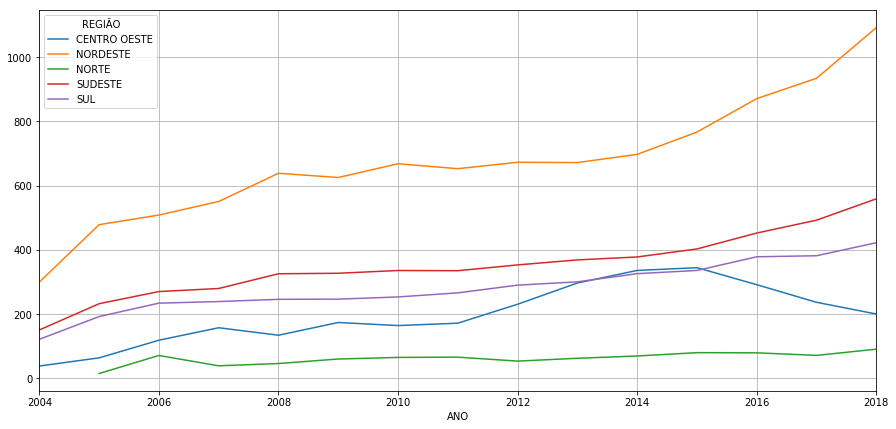

In [36]:
fig,ax=plt.subplots(figsize=(15,7))
df.query('ANO!=2019 & PRODUTO in ["GLV","GNV"]').groupby(['ANO','REGIÃO'])['PREÇO MÉDIO REVENDA'].agg('sum').unstack().plot(ax=ax)
plt.grid(True)

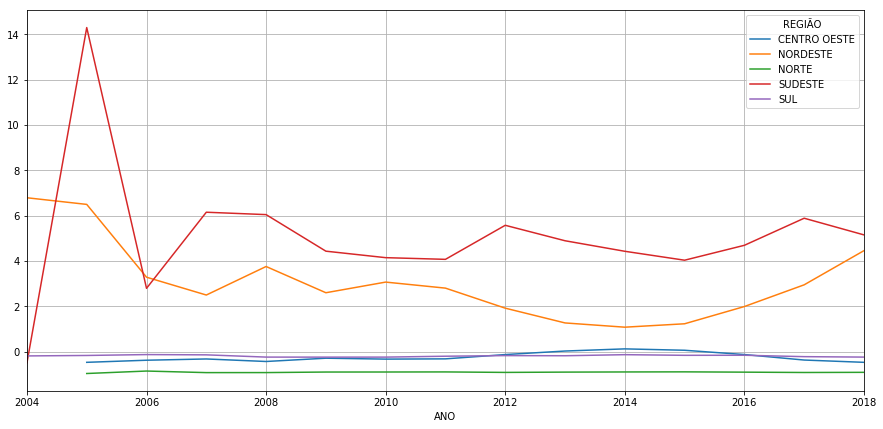

In [38]:
fig,ax=plt.subplots(figsize=(15,7))
df.query('ANO!=2019 & PRODUTO in ["GLV","GNV"]').groupby(['ANO','REGIÃO']).sum()['PREÇO MÉDIO REVENDA'].pct_change().unstack().plot(ax=ax)
plt.grid(True)

In [39]:
# As regiões NORDESTE e SUDESTE estão enfrentando um aumento
# maciço no preço do gás ~500%


In [40]:
df.query('ANO!=2019 & REGIÃO in ["NORDESTE"]').groupby(['ANO','ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum')

ANO   ESTADO             
2004  ALAGOAS                1261.541
      BAHIA                  1299.110
      CEARA                  1304.147
      MARANHAO               1292.654
      PARAIBA                1362.776
      PERNAMBUCO             1277.268
      PIAUI                  1360.680
      RIO GRANDE DO NORTE    1251.442
      SERGIPE                1296.334
2005  ALAGOAS                1844.105
      BAHIA                  1861.471
      CEARA                  1888.653
      MARANHAO               1852.827
      PARAIBA                1992.060
      PERNAMBUCO             1821.872
      PIAUI                  1997.647
      RIO GRANDE DO NORTE    1844.942
      SERGIPE                1908.901
2006  ALAGOAS                2116.933
      BAHIA                  2126.026
      CEARA                  2119.281
      MARANHAO               2175.708
      PARAIBA                2198.297
      PERNAMBUCO             2092.100
      PIAUI                  2224.780
      RIO GRANDE DO NORT

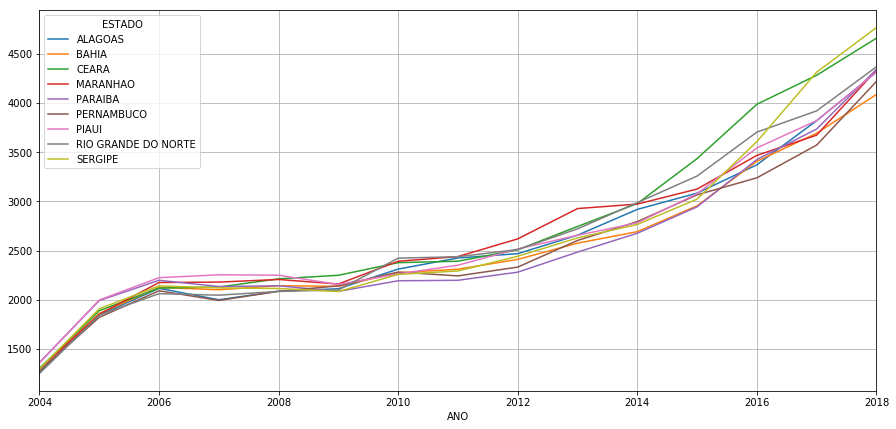

In [41]:
fig,ax=plt.subplots(figsize=(15,7))
df.query('ANO!=2019 & REGIÃO in ["NORDESTE"]').groupby(['ANO','ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum').unstack().plot(ax=ax)
plt.grid(True)

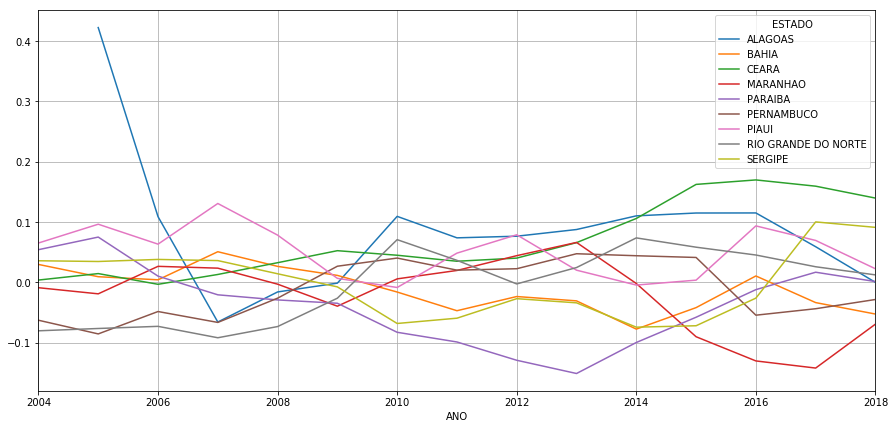

In [42]:
fig,ax=plt.subplots(figsize=(15,7))
df.query('ANO!=2019 & REGIÃO in ["NORDESTE"]').groupby(['ANO','ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum').pct_change().unstack().plot(ax=ax)
plt.grid(True)

In [43]:
# No NORDESTE, região do Ceará, o preço do gás aumentou 
# ao redor de 15%, seguido por SERGIPE com ~10%

In [44]:
df.query('ANO!=2019 & REGIÃO in ["CENTRO OESTE"]').groupby(['ANO','ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum')

ANO   ESTADO            
2004  DISTRITO FEDERAL      1312.214
      GOIAS                 1188.929
      MATO GROSSO           1496.874
      MATO GROSSO DO SUL    1374.623
2005  DISTRITO FEDERAL      1932.277
      GOIAS                 1743.532
      MATO GROSSO           2209.863
      MATO GROSSO DO SUL    2033.280
2006  DISTRITO FEDERAL      2220.572
      GOIAS                 1998.234
      MATO GROSSO           2531.352
      MATO GROSSO DO SUL    2340.501
2007  DISTRITO FEDERAL      2279.347
      GOIAS                 2000.742
      MATO GROSSO           2535.208
      MATO GROSSO DO SUL    2332.609
2008  DISTRITO FEDERAL      2255.537
      GOIAS                 2007.075
      MATO GROSSO           2477.869
      MATO GROSSO DO SUL    2328.480
2009  DISTRITO FEDERAL      2319.633
      GOIAS                 2164.114
      MATO GROSSO           2598.671
      MATO GROSSO DO SUL    2432.166
2010  DISTRITO FEDERAL      2438.133
      GOIAS                 2411.957
      MATO GR

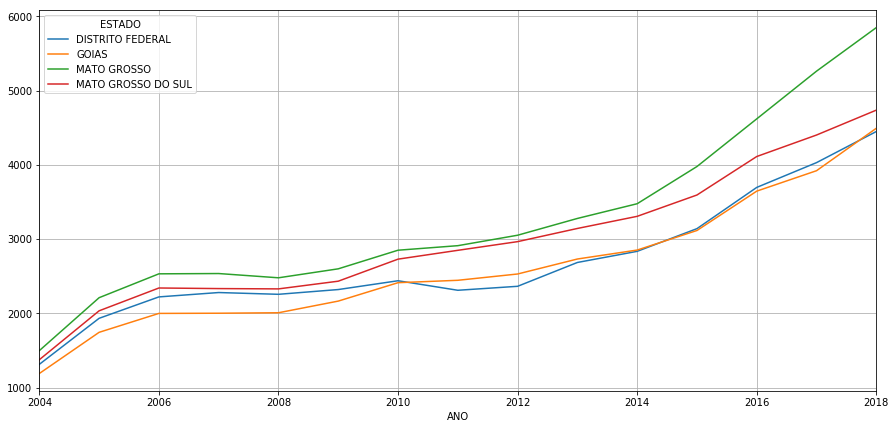

In [45]:
fig,ax=plt.subplots(figsize=(15,7))
df.query('ANO!=2019 & REGIÃO in ["CENTRO OESTE"]').groupby(['ANO','ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum').unstack().plot(ax=ax)
plt.grid(True)

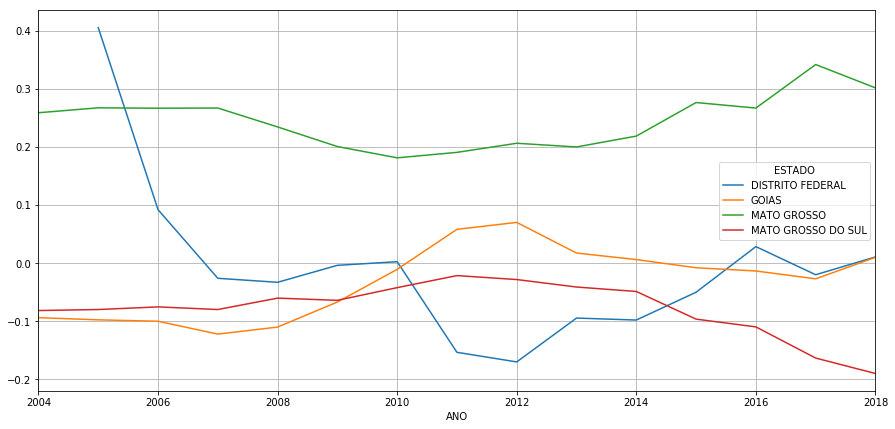

In [46]:
fig,ax=plt.subplots(figsize=(15,7))
df.query('ANO!=2019 & REGIÃO in ["CENTRO OESTE"]').groupby(['ANO','ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum').pct_change().unstack().plot(ax=ax)
plt.grid(True)

In [47]:
# No CENTRO OESTE a região do Mato Grosso teve um aumento
# no preço de ~30% seguido pelo DISTRITO FEDERAL com ~2%

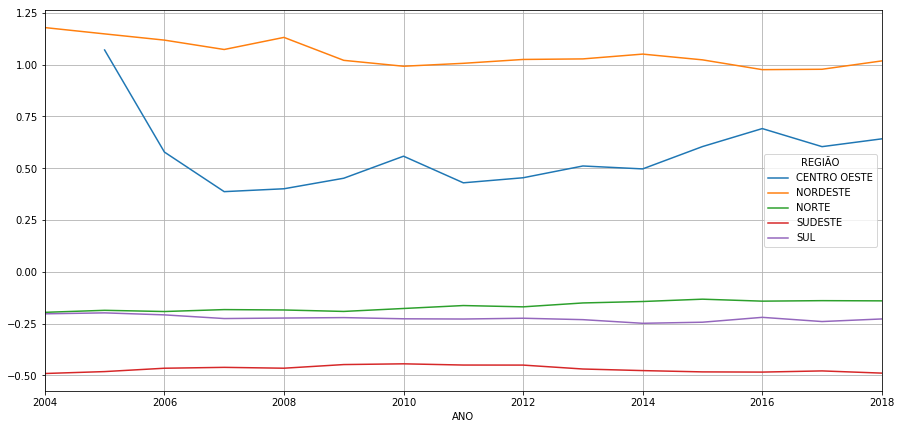

In [48]:
fig,ax=plt.subplots(figsize=(15,7))
df.query('ANO!=2019').groupby(['ANO','REGIÃO']).sum()['PREÇO MÉDIO REVENDA'].pct_change().unstack().plot(ax=ax)
plt.grid(True)

In [49]:
# Como essas duas regiões mostraram a maior parte do aumento de preços, 
# não explorarei mais outras regiões.

In [50]:
df.query('ANO!=2019').groupby(['ANO','ESTADO','PRODUTO'])['PREÇO MÉDIO REVENDA'].agg('sum')

ANO   ESTADO            PRODUTO         
2004  ACRE              ETANOL HIDRATADO      64.625
                        GASOLINA COMUM        86.083
                        GLP                 1298.038
                        ÓLEO DIESEL           62.617
      ALAGOAS           ETANOL HIDRATADO      48.333
                        GASOLINA COMUM        76.000
                        GLP                 1049.951
                        GNV                   37.092
                        ÓLEO DIESEL           50.165
      AMAPA             ETANOL HIDRATADO      64.358
                        GASOLINA COMUM        81.096
                        GLP                 1166.875
                        ÓLEO DIESEL           55.965
      AMAZONAS          ETANOL HIDRATADO      55.674
                        GASOLINA COMUM        76.557
                        GLP                 1047.163
                        ÓLEO DIESEL           55.458
      BAHIA             ETANOL HIDRATADO      53.546
     

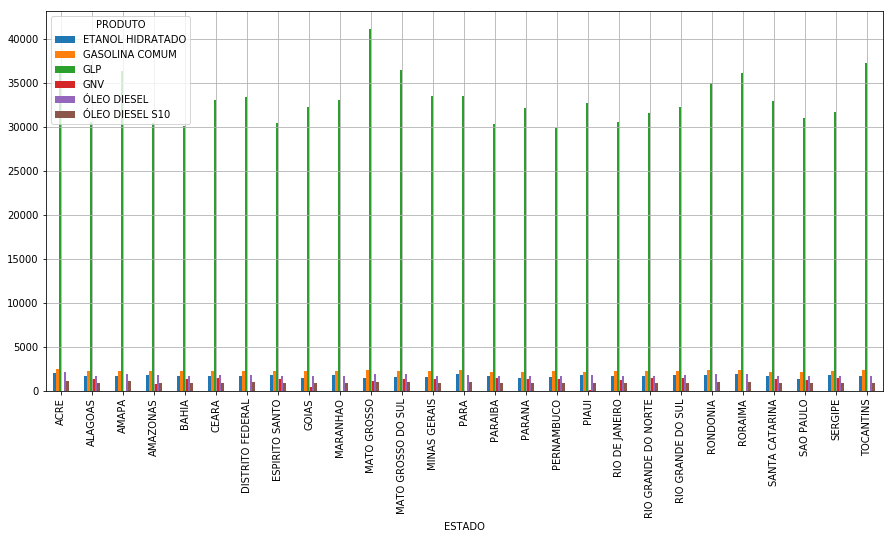

In [51]:
fig,ax=plt.subplots(figsize=(15,7))
df.query('ANO!=2019').groupby(['ESTADO','PRODUTO'])['PREÇO MÉDIO REVENDA'].agg('sum').unstack().plot(kind='bar',ax=ax)
plt.grid(True)

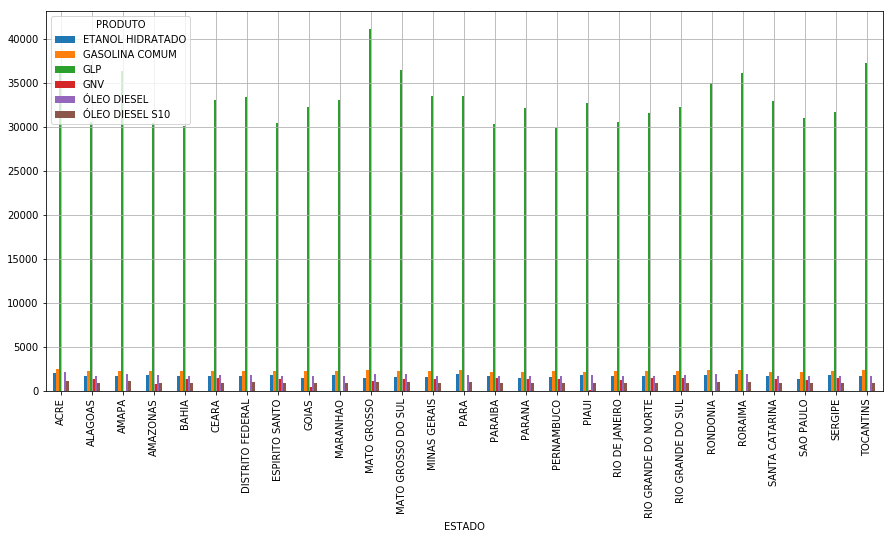

In [52]:
fig,ax=plt.subplots(figsize=(15,7))
df.query('ANO!=2019').groupby(['ESTADO','PRODUTO'])['PREÇO MÉDIO REVENDA'].agg('sum').unstack().plot(kind='bar',ax=ax)
plt.grid(True)

In [ ]:
'''
Para GLP, o MATO GROSSO é mais caro e o BAHIA é o mais barato.
Para GNV, o RIO GRANDE DO SUL é mais caro e o DISTRITO FEDERAL é o mais barato.
Para GASOLINA COMUM, o estado do ACRE é mais caro e SÃO PAULO é o mais barato.
Para ETANOL HIDRATADO, o estado de PARA é mais caro e SÃO PAULO é o mais barato.
Para ÓLEO DIESEL, o estado do ACRE é mais caro e o de SÃO PAULO é o mais barato.
Para ÓLEO DIESEL S10, o estado do ACRE é mais caro e o de SÃO PAULO é o mais barato.
'''